<h1> Project Report </h1>
<h3>DSA8023 Analytathon 1</h3>

* About Energia :
    Ireland's largest provider of 100% green electricity is Energia Group. Ireland's greenest electricity's engine. Gas and electricity are provided by Energia to both residential and commercial clients. They also provide their clients with options for renewable energy, such as solar and wind energy. Energia has recently made large investments in renewable energy, and by 2030, they want to produce 1 GW of renewable energy.

* Objective/ Challenge:
    Ireland has 70,000 Electric Vehicle(EV) consumer who own an electric vehicle. Energia has 10% of those customers. But we could only identify around 2.4K EV Customers from our databse as they are on EV Tariff.
    The problem arises because the other consumers may have an EV but are not on the EV Tariff.
    Finding the remaining suspected EV customers (customers who possess EVs but are not on the "EV Tariff") is our task.

* About database:

    We have 24 colunms in our database which are as follows, 
    1) accountID  2) StartDate  3) ContractStartDateEV  4) contractStartDate         
    5) contractEndDate  6) saStatus  7) agedBand  8) signedUpGroup  9) title                       
    10) mosaicType  10) EV  11) EV_New_or_Old  12) bill_1_2021  13) bill_2_2021                 
    14) bill_3_2021  15) bill_4_2021  16) bill_5_2021  17) bill_6_2021                 
    18) bill_1_2022  19) bill_2_2022  20) bill_3_2022  21) bill_4_2022                 
    22) bill_5_2022  23) bill_6_2022  24)bill_1_2023

* About bill columns:
    We have six billing records for each customer in a year because we bill each consumer every two months. Until February 2023, there will be 26 month's worth of billing information among the data that will be shared.

* EV_New_or_Old :
    Whether the consumer was an energia customer before switching to an electric vehicle tariff at whenever the customer chooses the EV Tariff or if they are a new customer.

* EV :
    This columns shows that the customer is EV customer or Not.


<h3> Implimentation </h3>

The first step is to perform EDA on the data. EDA assists in locating any missing information, anomalies, any variations in the data that could affect the precision and dependability of the findings.
On first step I have imported all the required libraries and keep importing as it necessary. There are some machine learning packages and some are data visualization libraries.

In [32]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, cohen_kappa_score

This line of code will display all the available columns in the dataframe.

In [33]:
# display every columns
pd.pandas.set_option("display.max_columns", None)

<h4> Reading and concating files together </h4>

In [34]:
# Importing both excel files

data1 = pd.read_excel("WB1_Energia_Challenge_March_2023_Data.xlsx", sheet_name="Data1", index_col=0)
data2 = pd.read_excel("WB2_Energia_Challenge_March_2023_Data.xlsx", sheet_name = "Data2", index_col=0)

In [35]:
# concatenating two files

data_f = pd.concat([data1,data2])
data_f.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


In [36]:
# Creating a copy of data
copy_df = data_f

<h4>Finding null, duplicates from the dataframe</h4>

In our dataframe there are lot of null values and duplicate rows are available. So, before starting the further process we must fix these anomlies. For that I checked the null values in data using the fullowing code. 

After finding the null values I checked the duplicated rows available in our dataframe. So after dropping the duplicates from the dataframe there is difference of 250 rows in data.It means there is 250 duplicate rows in data.

After that I checked the data type of each column in the dataframe so that I found first four columns are of DateTime format and next seven columns are of object format and other than that all the bills columns of folat type.

Next step is to handling missing values in dataframe. For handling the null values I have used Mean and median to fill where is null and NA's are available. I have decided what to used mean, mode and median by visualizing its skewness.

In [37]:
# Checking the count of null values 

print(data_f.isnull().sum())

StartDate                   0
ContractStartDateEV    184042
contractStartDate         577
contractEndDate           967
saStatus                    0
agedBand                    6
signedUpGroup               0
title                       2
mosaicType              42522
EV                          0
EV_New_or_Old               0
bill_1_2021                 0
bill_2_2021                 0
bill_3_2021                 0
bill_4_2021                 0
bill_5_2021                 0
bill_6_2021                 0
bill_1_2022                 0
bill_2_2022                 0
bill_3_2022                 0
bill_4_2022                 0
bill_5_2022                 0
bill_6_2022                 0
bill_1_2023                 0
dtype: int64


In [38]:
# dropping duplicates

data_f.drop_duplicates(subset= data_f.columns, keep="first",inplace=True)
data_f.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


In [39]:
# Check the descriptive statistics of the numerical columns in the dataset using the describe() function

data_f.describe()

,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
count,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000,186308.000000
mean,467.543640,562.869394,514.419580,466.980203,464.034969,578.078127,726.395452,678.274905,652.325875,565.477144,569.280128,689.277447,921.521030
std,718.371821,808.578089,667.667031,562.515026,534.701149,635.167423,786.543471,741.194852,640.578184,519.690488,485.116052,557.117550,758.419409
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.000000,250.000000,285.000000,353.000000,452.000000
50%,0.000000,225.000000,351.000000,375.000000,387.000000,489.000000,597.000000,550.000000,549.000000,490.000000,498.000000,595.000000,747.000000
75%,807.000000,877.000000,818.000000,733.000000,721.000000,873.000000,1069.000000,958.000000,893.000000,756.000000,746.000000,894.000000,1166.000000
max,8914.000000,9599.000000,9191.000000,9654.000000,9499.000000,8376.000000,9361.000000,9551.000000,9840.000000,8843.000000,8643.000000,9117.000000,9333.000000


In [40]:
data_f.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,NaN,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,NaN,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


In [41]:
# checking shape (number of rows and columns)
data_f.shape

(186308, 24)

In [42]:
# types of data in df
print(data_f.dtypes)

StartDate              datetime64[ns]
ContractStartDateEV    datetime64[ns]
contractStartDate      datetime64[ns]
contractEndDate        datetime64[ns]
saStatus                       object
agedBand                       object
signedUpGroup                  object
title                          object
mosaicType                     object
EV                             object
EV_New_or_Old                  object
bill_1_2021                   float64
bill_2_2021                   float64
bill_3_2021                   float64
bill_4_2021                   float64
bill_5_2021                   float64
bill_6_2021                   float64
bill_1_2022                   float64
bill_2_2022                   float64
bill_3_2022                   float64
bill_4_2022                   float64
bill_5_2022                   float64
bill_6_2022                   float64
bill_1_2023                   float64
dtype: object


In [43]:
# replace null values with mode value of the column


# calculate the mode
mode_value = data_f['mosaicType'].mode()[0]

# replace missing values with the mode value
data_f['mosaicType'].fillna(mode_value, inplace=True)


In [44]:
# for numerical colums removing null values

#contractStartDate 
mean_value1 = data_f['contractStartDate'].mean()
data_f['contractStartDate'].fillna(mean_value1, inplace=True)
#contractEndDate
mean_value2 = data_f['contractEndDate'].mean()
data_f['contractEndDate'].fillna(mean_value2, inplace=True)


In [45]:
data_f.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,M37,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,M37,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


<h4> Visualization for each bill columns in dataframe </h4>

* I have used for loop to iterate throgh all the columns and plot histogram which shows distribution of the data among these column. The graph shows that amout of bills and number of these values. Like if customer has bill of 2000 and there are 10000 customers who has 2000 bills in this column. because of this it easy to find skewness of that column and distribution of data. There are total 15 bills columns and all columns are Right skewed so first occured is mode, median and then mean. 

* I have used seaborn library to plot correlation. To produce the heatmap, the Seaborn library's sns.heatmap() function is utilised. The function converts the data from the DataFrame's correlation matrix to a colour gradient. The heatmap's diagonal, which indicates the correlation of each variable with itself and is always 1, is typically underlined in a different colour or left empty to prevent repetition.

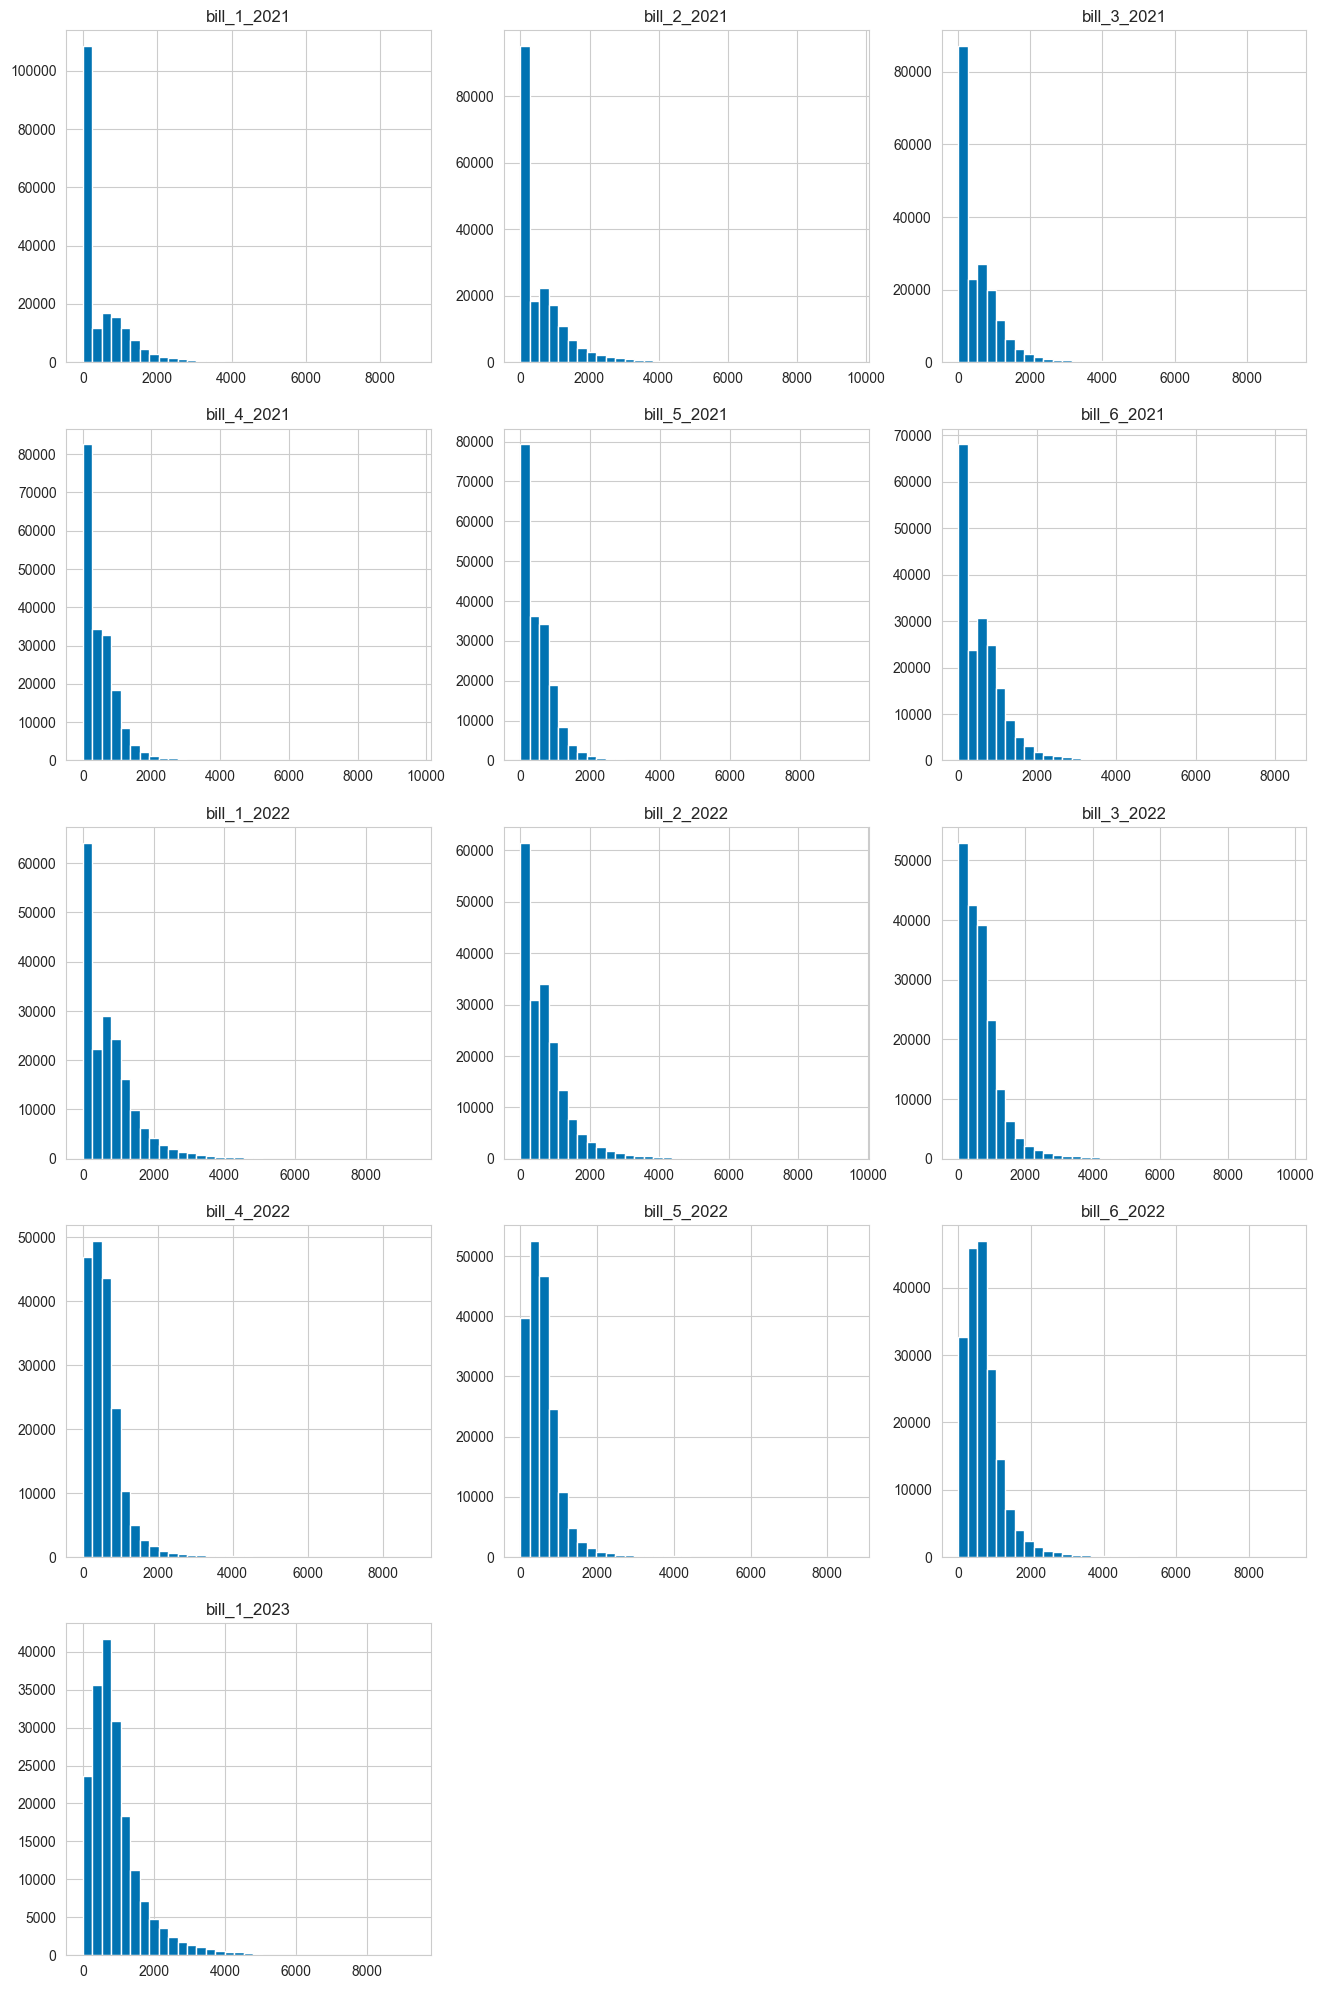

In [46]:

#Visualize the distribution of the numerical columns in the dataset using histograms:

# Select all the columns that have 'bill' in their name
bill_cols = [col for col in data_f.columns if 'bill' in col]

# Calculate the number of rows needed to fit all the bill columns in groups of 3
nrows = math.ceil(len(bill_cols) / 3)

# Create a grid of subplots with nrows rows and 3 columns
fig, axs = plt.subplots(nrows=nrows, ncols=3, figsize=(16, 5*nrows))

# Loop through each bill column and plot a histogram on the corresponding subplot
for i, col in enumerate(bill_cols):
    row_idx = i // 3  # Calculate the row index for this subplot
    col_idx = i % 3   # Calculate the column index for this subplot
    axs[row_idx, col_idx].hist(data_f[col], bins=35)
    axs[row_idx, col_idx].set_title(col)

# Hide the empty subplots in the last row, if any
for i in range(len(bill_cols) % 3, 3):
    axs[-1, i].set_visible(False)

plt.show()



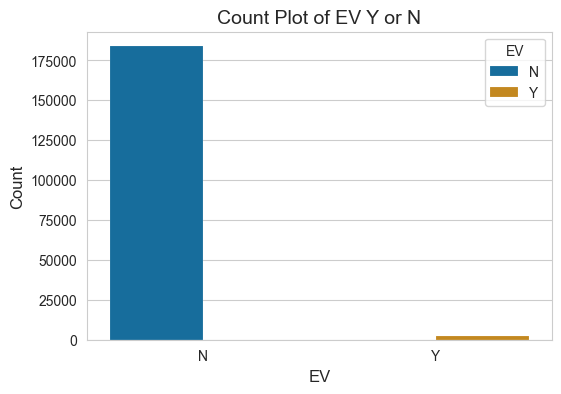

Number of Y in EV column: 2510
Number of N in EV column: 183798


In [47]:
# plotting bar count plot for EV column

sns.set_style("whitegrid")
sns.set_palette("colorblind")

plt.figure(figsize=(6, 4))
ax = sns.countplot(x="EV", data=data_f, hue="EV", linewidth=0.1)
ax.set_xlabel("EV", fontsize=12)
ax.set_ylabel("Count", fontsize=12)
ax.tick_params(labelsize=10)
plt.legend(title="EV", fontsize=10)
plt.title("Count Plot of EV Y or N", fontsize=14)
plt.show()

ev_counts = data_f["EV"].value_counts()
y_count = ev_counts["Y"]
n_count = ev_counts["N"]
print("Number of Y in EV column:", y_count)
print("Number of N in EV column:", n_count)

In [48]:
heatmap_df = data_f.loc[:, ['bill_1_2021', 'bill_2_2021', 'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021', 'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022', 'bill_5_2022', 'bill_6_2022', 'bill_1_2023']]


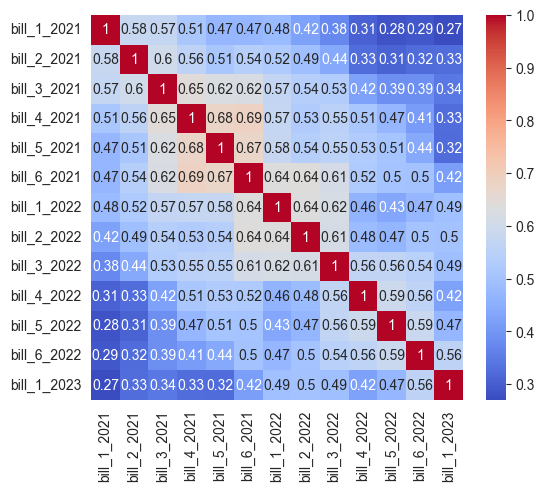

In [49]:
# Visualize the correlation between the numerical columns in the dataset using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(heatmap_df.corr(), annot=True, cmap='coolwarm')
plt.show()

<h4>Replacing zeros with non_zero and slicing of data</h4>

* First I have checked columns who are of 'object' type, so there are 7 columns who are of object type. As per my visualization the most important column is 'EV' column where it defines the customer is EV or not. 
I observed that if the bills of customer are increasing dusring the months on months or if during any bill cycle bills of customer suddenly increased then I can assume that customer has bought EV (Electric Vehicle) so that he is charging the vehicle and bills are getting increased. So, if customers bills are increasing but in EV column it shows 'N' means non-EV customer. Therefor I considered 'EV' column and rest of all the 'Bills' columns to build my models.

* While visualizing the data I noticed that there are many 0's between the bill values of two months. It will decrease the accuracy of models, to fix this data I used 'Replace' and 'ffile' function. If in first month customer has a bill of '600' and in second month it shows 'zero' (0) in the database and in third month it shows '1000', so we can say that in second month customer will get at least bill of 600.
So following this flow I filled all the zero values between two non-zero values with it's previous non-zero value. After filling this our dataframe is with very less zero values in it.

In [50]:
# only catogarial data
catog_data=data_f.describe(include='object')
catog_data

,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old
count,186308,186302,186308,186306,186308,186308,186308
unique,1,8,6,9,43,2,3
top,Active,Unclassified,Other,Mr,M37,N,Non-EV Customers
freq,186308,111859,43391,98457,48995,183798,183798


In [51]:
# creating a copy of dataframe
copy_data = data_f
data_f.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,M37,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,0.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,M37,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


<h4> Replacing the zero between two non-zero values</h4>

In [52]:
# Replace 0s with previous non-zero values
cols_to_modify = data_f.columns[11:-1]
# Use the ffill method along the row axis to replace 0s with previous non-zero values
data_f[cols_to_modify] = data_f[cols_to_modify].replace(0, np.nan)
data_f[cols_to_modify] = data_f[cols_to_modify].ffill(axis=1)
data_f[cols_to_modify] = data_f[cols_to_modify].replace(np.nan, 0)

data_f.head()

,StartDate,ContractStartDateEV,contractStartDate,contractEndDate,saStatus,agedBand,signedUpGroup,title,mosaicType,EV,EV_New_or_Old,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,,,,,,,,,,,
0,2022-05-03,NaT,2022-05-03,2023-05-03,Active,41 to 50,PCW,Mr,M37,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,696.0,2813.0
1,2018-03-09,NaT,2023-03-14,2024-03-14,Active,Unclassified,Telesales,Ms,F17,N,Non-EV Customers,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,2022-01-14,NaT,2023-01-15,2024-01-15,Active,Unclassified,Other,Mr,G18,N,Non-EV Customers,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,2021-03-23,NaT,2021-03-23,2022-03-23,Active,41 to 50,Other,Mrs,K31,N,Non-EV Customers,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,2020-10-29,NaT,2021-10-30,2022-10-30,Active,Unclassified,Telesales,Mr,M37,N,Non-EV Customers,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


<h4> Creating Max column which contains a max value from the row of each column </h4>

I have created a 'Max' column which holds the maximum value of that row. With the use of that max column I can visualize the maximum value of that row. So after plotting the curve on this column we can visualize the representation of the max value per column. With that max value we can predict like we can take a median from the bill data and if max value is lower than the median of that row then we can classify that data on the basis on that max and median values. After doing this I took onlyh 'EV' column and rest of the all 'bill' columns to predict the models.

In [53]:
# creating max and min values of total bill columns

data_f["Max value"] = data_f.iloc[:, 11:-1].max(axis=1)

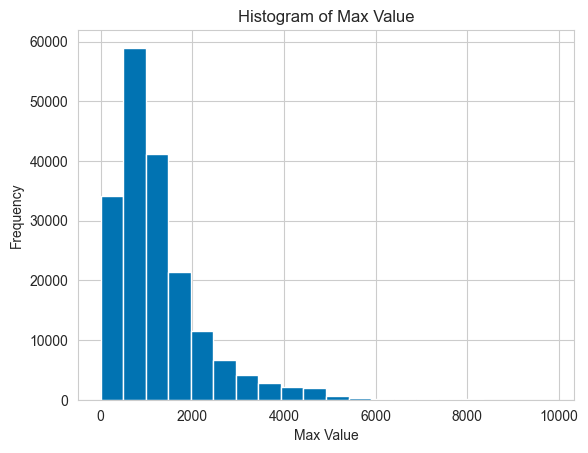

In [54]:
# Plot a histogram of the "Max value" column to check spread of data
plt.hist(data_f['Max value'], bins=20)

# Add labels and title
plt.xlabel('Max Value')
plt.ylabel('Frequency')
plt.title('Histogram of Max Value')
# Show the plot
plt.show()

<h4> Taking only 'EV' and 'Blls' columns to build models </h4>

In [55]:
# Taking only EV column and bills columns

working_df = data_f.loc[:, ['EV', 'bill_1_2021', 'bill_2_2021', 'bill_3_2021', 'bill_4_2021', 'bill_5_2021', 'bill_6_2021', 'bill_1_2022', 'bill_2_2022', 'bill_3_2022', 'bill_4_2022', 'bill_5_2022', 'bill_6_2022', 'bill_1_2023']]
working_df.head()


,EV,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,
0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,696.0,2813.0
1,N,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,N,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,N,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,N,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


In [56]:
# making a copy of working_df for ploting curve 
curve_df = working_df


<h4> Importing the packages for ML models </h4>

* Scikit-learn :- Scikit-learn, a well-known Python package for machine learning, provides a number of tools. for creating and analysing machine learning models. It contains techniques for model selection, regression, clustering, dimensionality reduction, and preprocessing. Additionally, it has tools for modelling evaluation, including metrics like precision, recall, F1 score, and confusion matrix.

* NumPy :-  is a Python library for scientific computing that provides access to a wide range of mathematical operations that may be performed on large multidimensional arrays and matrices. For numerical calculations, it is widely utilised in data science and machine learning.

* Pandas :- It is a Python library for analysing and manipulating data. It offers data structures for effectively managing and storing data as well as capabilities for reading and writing data to and from a number of different file formats. In machine learning workflows, it is frequently used for data preprocessing and cleaning.

* Matplotlib :- A Python library for data visualisation is called Matplotlib. To construct various charts and graphs, it has a broad variety of plotting capabilities, including those for line plots, scatter plots, bar charts, histograms, and more. It is frequently employed for rendering the output of machine learning models.

* Seaborn :- Seaborn is a Python data visualisation library built on top of Matplotlib. It provides a sophisticated user interface for creating striking statistics graphics., such as distribution plots, violin plots, and heatmaps. In datasets for machine learning, it is frequently used to visualise the relationships between variables.



In [57]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_recall_fscore_support, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression


In [58]:
working_df.head()

,EV,bill_1_2021,bill_2_2021,bill_3_2021,bill_4_2021,bill_5_2021,bill_6_2021,bill_1_2022,bill_2_2022,bill_3_2022,bill_4_2022,bill_5_2022,bill_6_2022,bill_1_2023
accountID,,,,,,,,,,,,,,
0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,581.0,542.0,696.0,696.0,2813.0
1,N,1278.0,1008.0,1278.0,926.0,1131.0,1081.0,1200.0,1179.0,1182.0,985.0,917.0,983.0,1130.0
2,N,0.0,0.0,0.0,0.0,0.0,0.0,381.0,706.0,629.0,681.0,848.0,1455.0,0.0
3,N,0.0,0.0,428.0,348.0,343.0,456.0,470.0,381.0,364.0,333.0,397.0,407.0,526.0
4,N,670.0,736.0,452.0,663.0,265.0,313.0,497.0,183.0,250.0,234.0,381.0,358.0,233.0


<h4> Oversampling the data </h4>

* By boosting the amount of samples in the minority class, Oversampling is a machine learning technique used to balance uneven datasets. This method is applied when there is a clear class imbalance in the dataset, meaning that there are many more samples in one class than the other. In these circumstances, the machine learning model might be biassed in favour of the majority class, which would result in poor results for the minority class.

* To improve the performance of the machine learning model on the minority class, oversampling is used to enhance the representation of the minority class in the dataset.
The minority class samples already present in the dataset can be duplicated in pandas until the appropriate balance is obtained. We can oversample the minority class, for instance, by duplicating its samples until it contains, say, 80 samples, in the case of a dataset with 100 samples in the majority class and 20 samples in the minority class. With 100 samples in each class, the outcome will be a balanced dataset.

In [59]:
# Oversampling the data

X = working_df.drop('EV', axis=1)
y = working_df['EV']

# Create an instance of the SMOTE oversampling object
smote = SMOTE(random_state=42)

# Apply the SMOTE oversampling technique to the training data
X_sample, y_sample = smote.fit_resample(X, y)
y_sample.value_counts()


N    183798
Y    183798
Name: EV, dtype: int64

<h4>Model Building</h4>

KNN ( K-Nearest Neighbors ) :-
An efficient machine learning model for both classification and regression problems is the K-Nearest Neighbours (KNN) algorithm. The model finds the K training instances that are closest to the new data point in the feature space, then predicts the class or value of the new data point using the majority class or mean value of the K neighbours.. The choice of K's value can have a big impact on the model's performance because a small value can cause overfitting while a large value can cause underfitting.

Using K-Nearest Neighbours (KNN) classification model on a dataset to train and test split and make predictions. I have loaded processed the dataset in the code then which divides it into training and testing sets. The KNN model is then created and fitted to the training set using an instance with a predetermined number of neighbours. The model is then used to forecast the test set's target variable, and its performance is assessed using a variety of metrics including accuracy, precision, recall, and F1 score. The confusion matrix and kappa score are also calculated in order to assess how well the model is working.

After running the KNN model on my data I am getting the following observations.

Accuracy: 0.9379080522306855
Precision: 0.8974001741510138
Recall: 0.9879217791411042
F1 score: 0.9404878303153558
[[32884  4124]
 [  441 36071]]
Kappa score: 0.8758943426876147


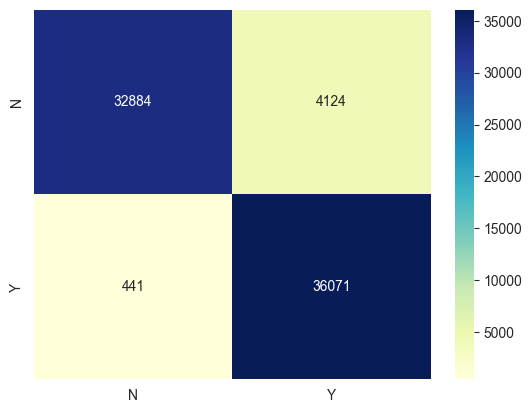

In [60]:
# building model knn

X = working_df.drop('EV', axis=1)
y = working_df['EV']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Create an instance of the KNN model and fit on the training set
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict the target variable on the test set using the trained KNN model
y_pred = knn.predict(X_test)

# Evaluate the performance of the KNN model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='Y')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])

print(cm)
kappa_score = cohen_kappa_score(y_test, y_pred)
print("Kappa score:", kappa_score)

#### Decision Tree 

The decision tree is an example of supervised learning in machine learning. In order to successfully forecast the target variable, a tree-like model is constructed by recursively dividing the data into smaller groups based on the values of the features.
The value of a single feature is used at each node of the tree to make a judgement about which branch should come next. The process continues up until the stopping requirement is satisfied or the leaves of the tree contain just one class.

The data is initially separated between training and testing sets using the train_test_split method that. The DecisionTreeClassifier model is then generated, and The fit function is used to train an instance of it on the training set.
The target variable for the test set is then predicted by the trained model using the predict function. The scikit-learn accuracy_score function is used to determine the model's accuracy.
The scikit-learn precision_recall_fscore_support function is used to calculate precision, recall, and F1 score. Additionally, the confusion matrix is displayed using the seaborn library's confusion_matrix function.
The performance of the model is then assessed by calculating the kappa score using the cohen_kappa_score function from scikit-learn. I got the observations which as follows. 

Accuracy: 0.9317600652883569
Precision: 0.9161931442767661
Recall: 0.9494412795793163
F1 score: 0.9325209484996435
[[33837  3171]
 [ 1846 34666]]
Kappa score: 0.8635471017067762


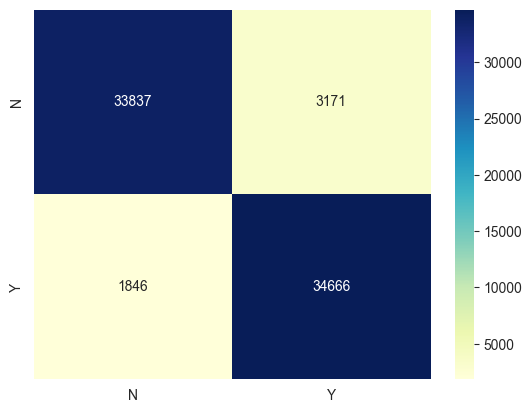

In [61]:
# decision tree

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)
# Create an instance of the DecisionTreeClassifier model and fit on the training set
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Predict the target variable on the test set using the trained DecisionTreeClassifier model
y_pred = dtc.predict(X_test)

# Evaluate the performance of the DecisionTreeClassifier model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label='Y')

print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1_score)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt='g', xticklabels=['N', 'Y'], yticklabels=['N', 'Y'])

print(cm)

kappa_score = cohen_kappa_score(y_test, y_pred)
print("Kappa score:", kappa_score)

### Comparison between two models


#### KNN Model:

* Accuracy: 0.9379080522306855

* Precision: 0.8974001741510138

* Recall: 0.9879217791411042

* F1 score: 0.9404878303153558

 
* Kappa score: 0.8758943426876147

#### Decision Tree Model
* Accuracy: 0.9319912948857454

* Precision: 0.9164067868280564

* Recall: 0.9496877738825592

* F1 score: 0.9327505043712172
 
* Kappa score: 0.8640094944634787

#### Explanation
* According to the presented observations, When it comes to accuracy, the KNN model performs better than the decision tree model (0.9379) and recall (0.9879). The decision tree model, however, outperforms the KNN model in terms of precision (0.9164) and F1 score (0.9327). The KNN model's Kappa score is 0.8758, which is greater than the decision tree model's (0.8640) score.


#### Conclusion

In comparison to the decision tree model, the KNN model has higher accuracy and recall, which makes it better at correctly recognising positive instances (i.e., reducing false negatives). In contrast to the KNN model, the decision tree model has a greater precision and F1 score, which indicates that it performs better at correctly detecting instances of true positive data (i.e., minimising false positives).

I recommend using the KNN model for locating potential EV customers based on my analysis of the Decision Tree and KNN models. Even while both models performed effectively, the KNN model produced a result that was more in line with the targeted number of suspected EV customers than the Decision Tree model. According to the KNN model, the database contains 4124 suspected EV consumers who own EVs. So, for this purpose, I advise utilising the KNN model.
